<a href="https://colab.research.google.com/github/theheking/intro-to-python/blob/gh-pages/3_Indexing_Filled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indexing, Slicing and Subsetting
Objectives: 
To be able to...
-    Index
-    Slice
-    Subset
your pandas dataframe



In [ ]:
# make sure the `pandas` package is installed
!pip install pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading our data

We will continue to use the patient dataset that we worked with in the last section.

In [ ]:
# Download a file using python
import urllib.request # this is the library we need 

url = 'https://raw.githubusercontent.com/theheking/intro-to-python/gh-pages/docs/patient_data.csv'
#retrieve the file

urllib.request.urlretrieve(url, 'patient_data.csv')

('patient_data.csv', <http.client.HTTPMessage at 0x7f012f54b580>)

In [ ]:
#import pandas as a package
import pandas as pd 

#read in the patient data 
patient_df=pd.read_csv('patient_data.csv', sep=',')

# Indexing and Slicing in Python

We often want to work with subsets of a DataFrame object. There are different ways to accomplish this including: using labels (column headings), numeric ranges, or specific x,y index locations.

In [ ]:
# method 1- select a 'subset' of the data using the column name using []
patient_df["illness"].head()

0        cold
1    stabbing
2       faint
3    jaundice
4         NaN
Name: illness, dtype: object

In [ ]:
# method 2- select a 'subset' of the data using the column name using . 
patient_df.illness.head()

0        cold
1    stabbing
2       faint
3    jaundice
4         NaN
Name: illness, dtype: object

In [ ]:
#create a new object that contains only the data within the illnes column
patient_illness = patient_df["illness"]
patient_illness

0                 cold
1             stabbing
2                faint
3             jaundice
4                  NaN
             ...      
1186           myeloma
1187            nstemi
1188            septic
1189    aortic anurysm
1190          overdose
Name: illness, Length: 1191, dtype: object

In [ ]:
# create an object, surveys_species, that only contains illness and site id 
patient_site_illness = patient_df[['illness', 'site_id']]
#what happens if you subset for a column that doesn't exist

#what happens when you flip the order 
patient_site_illness = patient_df[['site_id', 'illness']]


#### Slicing Subsets of Rows in Python

Slicing using the [] operator selects a set of rows and/or columns from a DataFrame. To slice out a set of rows, you use the following syntax: data[start:stop]. When slicing in pandas the start bound is included in the output. The stop bound is one step BEYOND the row you want to select. So if you want to select rows 0, 1 and 2 your code would look like this with our data:


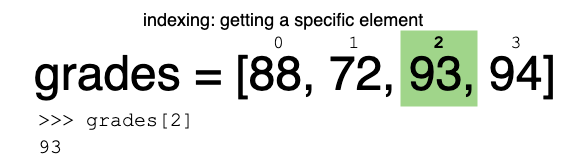
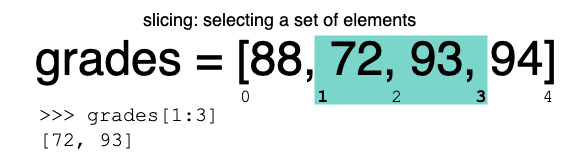

In [ ]:
#form a list 
a=[5,6,82,3,5,4]
a[0:3]

[5, 6, 82]

In [ ]:
# Select rows 0, 1, 2 (row 3 is not selected)
patient_df[0:3]

,patient_id,site_id,sex,time,year,month,day,illness,weight
0,1,2,M,9:27 am,2022.0,1.0,12.0,cold,27.0
1,2,3,M,10:57 am,2022.0,1.0,12.0,stabbing,37.0
2,3,2,F,4:33 pm,2022.0,1.0,12.0,faint,19.0


In [ ]:
#subset from the beginning row without using 0
patient_df[:5]

,patient_id,site_id,sex,time,year,month,day,illness,weight
0,1,2,M,9:27 am,2022.0,1.0,12.0,cold,27.0
1,2,3,M,10:57 am,2022.0,1.0,12.0,stabbing,37.0
2,3,2,F,4:33 pm,2022.0,1.0,12.0,faint,19.0
3,4,7,M,4:52 pm,2022.0,1.0,12.0,jaundice,19.0
4,5,3,M,7:26 pm,2022.0,1.0,12.0,NaN,36.0


In [ ]:
#subset the 500 to last row
patient_df[500:]

,patient_id,site_id,sex,time,year,month,day,illness,weight
500,501,21,NaN,5:56 pm,2022.0,11.0,28.0,cold,NaN
501,502,5,F,7:18 pm,2022.0,11.0,28.0,stabbing,29.0
502,503,15,NaN,11:47 pm,2022.0,11.0,28.0,faint,25.0
503,504,3,NaN,1:10 pm,2022.0,11.0,29.0,jaundice,17.0
504,505,13,M,1:58 pm,2022.0,11.0,29.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1186,1187,16,F,4:00 pm,2022.0,11.0,8.0,myeloma,36.0
1187,1188,1,M,NaN,NaN,NaN,NaN,nstemi,35.0
1188,1189,4,F,9:45 am,2022.0,11.0,25.0,septic,37.0
1189,1190,13,M,8:05 am,2022.0,11.0,12.0,aortic anurysm,35.0


In [ ]:
#last record in the row 
patient_df[-1:]

,patient_id,site_id,sex,time,year,month,day,illness,weight
1190,1191,5,F,1:17 pm,2022.0,11.0,5.0,overdose,38.0


Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

-    loc is primarily label based indexing. Integers may be used but they are interpreted as a label.
-    iloc is primarily integer based indexing

To select a subset of rows and columns from our DataFrame, we can use the iloc method. For example, we can select month, day and year (columns 2, 3 and 4 if we start counting at 1), like this:

<b> iloc[row slicing, column slicing] </b>

In [ ]:
patient_df.iloc[0:3, 1:4]

,site_id,sex,time
0,2,M,9:27 am
1,3,M,10:57 am
2,2,F,4:33 pm


In [ ]:
# Select all columns for rows of index values 0 and 10
patient_df.iloc[[0, 10], :]

,patient_id,site_id,sex,time,year,month,day,illness,weight
0,1,2,M,9:27 am,2022.0,1.0,12.0,cold,27.0
10,11,5,F,2:14 pm,2022.0,3.0,12.0,overdose,26.0


In [ ]:
#subset the illness, site id and weight in the 300th row 
patient_df.loc[300, ['illness', 'site_id', 'weight']]

illness    cold
site_id      17
weight      NaN
Name: 300, dtype: object

In [ ]:
#is there a difference between running iloc and loc 
patient_df.iloc[[0, 10, 100], :]

#NOTE: Labels must be found in the DataFrame or you will get a KeyError.

patient_df.loc[[0, 10, 100], :]

,patient_id,site_id,sex,time,year,month,day,illness,weight
0,1,2,M,9:27 am,2022.0,1.0,12.0,cold,27.0
10,11,5,F,2:14 pm,2022.0,3.0,12.0,overdose,26.0
100,101,5,F,4:52 pm,2022.0,12.0,21.0,cold,46.0


In [ ]:
#change the range- what is the difference 
patient_df.iloc[0:4, 1:4]

,site_id,sex,time
0,2,M,9:27 am
1,3,M,10:57 am
2,2,F,4:33 pm
3,7,M,4:52 pm


Subsetting Data using Criteria

We can also select a subset of our data using criteria. For example, we can select all rows that have a year value of 2002:

In [ ]:
patient_df[patient_df.month != 11]

,patient_id,site_id,sex,time,year,month,day,illness,weight
0,1,2,M,9:27 am,2022.0,1.0,12.0,cold,27.0
1,2,3,M,10:57 am,2022.0,1.0,12.0,stabbing,37.0
2,3,2,F,4:33 pm,2022.0,1.0,12.0,faint,19.0
3,4,7,M,4:52 pm,2022.0,1.0,12.0,jaundice,19.0
4,5,3,M,7:26 pm,2022.0,1.0,12.0,NaN,36.0
...,...,...,...,...,...,...,...,...,...
1176,1177,14,M,7:49 pm,2022.0,12.0,2.0,MVA,NaN
1179,1180,4,F,2:30 pm,2022.0,10.0,29.0,NaN,39.0
1183,1184,14,F,11:37 am,2022.0,12.0,2.0,jaundice,27.0
1184,1185,1,F,NaN,NaN,NaN,NaN,NaN,37.0


In [ ]:
#extract all the entries between and equal to febuary and august
patient_df[(patient_df.month >= 2) & (patient_df.month <= 8 )]

,patient_id,site_id,sex,time,year,month,day,illness,weight
5,6,1,M,6:24 am,2022.0,2.0,12.0,neck dissection,34.0
6,7,2,F,2:57 pm,2022.0,2.0,12.0,myeloma,20.0
7,8,1,M,3:45 pm,2022.0,2.0,12.0,nstemi,38.0
8,9,1,F,7:06 pm,2022.0,2.0,12.0,septic,29.0
9,10,6,F,3:23 am,2022.0,3.0,12.0,aortic anurysm,20.0
...,...,...,...,...,...,...,...,...,...
689,690,11,M,5:25 pm,2023.0,4.0,1.0,aortic anurysm,106.0
696,697,11,M,10:31 am,2023.0,2.0,16.0,MVA,11.0
754,755,3,F,1:11 pm,2023.0,7.0,1.0,valve replacement,49.0
785,786,11,M,12:00 am,1901.0,8.0,24.0,neck dissection,49.0


# Python Syntax Cheat Sheet

Use can use the syntax below when querying data by criteria from a DataFrame. Experiment with selecting various subsets of the "surveys" data.

-    Equals: ==
-    Not equals: !=
-    Greater than, less than: > or <
-    Greater than or equal to >=
-    Less than or equal to <=


In [ ]:
#find patients from 2022, before august and weighs less than 50
patient_df[(patient_df["year"] == 2022) & (patient_df["month"] <= 8) & (patient_df["weight"] < 50)]

,patient_id,site_id,sex,time,year,month,day,illness,weight
0,1,2,M,9:27 am,2022.0,1.0,12.0,cold,27.0
1,2,3,M,10:57 am,2022.0,1.0,12.0,stabbing,37.0
2,3,2,F,4:33 pm,2022.0,1.0,12.0,faint,19.0
3,4,7,M,4:52 pm,2022.0,1.0,12.0,jaundice,19.0
4,5,3,M,7:26 pm,2022.0,1.0,12.0,NaN,36.0
5,6,1,M,6:24 am,2022.0,2.0,12.0,neck dissection,34.0
6,7,2,F,2:57 pm,2022.0,2.0,12.0,myeloma,20.0
7,8,1,M,3:45 pm,2022.0,2.0,12.0,nstemi,38.0
8,9,1,F,7:06 pm,2022.0,2.0,12.0,septic,29.0
9,10,6,F,3:23 am,2022.0,3.0,12.0,aortic anurysm,20.0


In [ ]:
#create a list that form
listGoesHere=["stabbing","cold"]

#subset the illness in list
patient_df[patient_df['illness'].isin(listGoesHere)]

,patient_id,site_id,sex,time,year,month,day,illness,weight
0,1,2,M,9:27 am,2022.0,1.0,12.0,cold,27.0
1,2,3,M,10:57 am,2022.0,1.0,12.0,stabbing,37.0
20,21,14,F,12:07 am,2022.0,6.0,12.0,cold,20.0
21,22,15,F,10:05 am,2022.0,6.0,12.0,stabbing,34.0
40,41,23,F,1:24 pm,2022.0,9.0,12.0,cold,NaN
...,...,...,...,...,...,...,...,...,...
1141,1142,21,M,NaN,NaN,NaN,NaN,stabbing,20.0
1160,1161,6,F,NaN,NaN,NaN,NaN,cold,46.0
1161,1162,5,M,4:30 pm,2022.0,10.0,31.0,stabbing,26.0
1180,1181,15,F,1:05 pm,2022.0,11.0,9.0,cold,36.0


In [ ]:
#find the number of site ids using nunique
site_names = patient_df["site_id"].nunique()
site_names

23

In [ ]:
#print the subset patient_df for site 
mask = patient_df["site_id"] == 2
patient_df[mask]

,patient_id,site_id,sex,time,year,month,day,illness,weight
0,1,2,M,9:27 am,2022.0,1.0,12.0,cold,27.0
2,3,2,F,4:33 pm,2022.0,1.0,12.0,faint,19.0
6,7,2,F,2:57 pm,2022.0,2.0,12.0,myeloma,20.0
17,18,2,M,3:17 pm,2022.0,5.0,12.0,diabetic ketoacidosois,20.0
68,69,2,M,12:32 pm,2022.0,12.0,15.0,septic,8.0
...,...,...,...,...,...,...,...,...,...
1061,1062,2,F,10:18 am,2022.0,10.0,8.0,stabbing,48.0
1150,1151,2,M,3:53 pm,2022.0,10.0,29.0,overdose,33.0
1158,1159,2,F,12:41 pm,2022.0,11.0,1.0,mva,25.0
1163,1164,2,M,12:00 pm,2022.0,11.0,18.0,jaundice,35.0
